<a href="https://colab.research.google.com/github/koeyhnim/banghak/blob/chap-7/my_notebook_chap7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

affine = transforms.RandomAffine((-30, 30),  # 회전
                                 scale=(0.8, 1.2),  # 확대와 축소
                                 translate=(0.5, 0.5))  # 이동
flip = transforms.RandomHorizontalFlip(p=0.5)  # 좌우반전
invert = transforms.RandomInvert(p=0.5)  # 색의 반전
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize((0.0), (1.0))  # 평균값을 0, 표준편차를 1로
erase = transforms.RandomErasing(p=0.5)  # 일부를 소거

transform_train = transforms.Compose([affine, flip, invert, to_tensor, normalize, erase])
transform_test = transforms.Compose([to_tensor, normalize])
fashion_train = FashionMNIST("./data", train=True, download=True, transform=transform_train)
fashion_test = FashionMNIST("./data", train=False, download=True, transform=transform_test)

# DataLoader의 설정
batch_size = 64
train_loader = DataLoader(fashion_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fashion_test, batch_size=batch_size, shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.87MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.57MB/s]


In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 3)
        self.conv２ = nn.Conv2d(8, 16, 3)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.conv4 = nn.Conv2d(32, 64, 3)
        self.bn2 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()

        self.fc1 = nn.Linear(64*4*4, 256)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.bn1(self.conv2(x)))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.bn2(self.conv4(x)))
        x = self.pool(x)
        x = x.view(-1, 64*4*4)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = Net()
net.cuda()  # GPU 대응
print(net)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
from torch import optim

# 교차 엔트로피 오차 함수
loss_fnc = nn.CrossEntropyLoss()

# 최적화 알고리즘
optimizer = optim.Adam(net.parameters())

# 손실의 로그
record_loss_train = []
record_loss_test = []

# 학습
for i in range(30):  # 30 에포크 학습
    net.train()  # 훈련 모드
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):  # 미니배치 (x, t)를 꺼낸다
        x, t = x.cuda(), t.cuda()  # GPU 대응
        y = net(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    net.eval()  # 평가 모드
    loss_test = 0
    for j, (x, t) in enumerate(test_loader):  # 미니배치 (x, t)를 꺼낸다
        x, t = x.cuda(), t.cuda()  # GPU 대응
        y = net(x)
        loss = loss_fnc(y, t)
        loss_test += loss.item()
    loss_test /= j+1
    record_loss_test.append(loss_test)

    if i%1 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train, "Loss_Test:", loss_test)

Epoch: 0 Loss_Train: 1.8896823831712768 Loss_Test: 1.306669423534612
Epoch: 1 Loss_Train: 1.6171982301069474 Loss_Test: 1.2680028532720675
Epoch: 2 Loss_Train: 1.5081194115600098 Loss_Test: 1.0382113828780546
Epoch: 3 Loss_Train: 1.4337816903077718 Loss_Test: 1.0082826356219639
Epoch: 4 Loss_Train: 1.379979063071676 Loss_Test: 1.1074553139650138
Epoch: 5 Loss_Train: 1.3321798794559325 Loss_Test: 0.8426963235162626
Epoch: 6 Loss_Train: 1.3050127641986937 Loss_Test: 0.8160850288002355
Epoch: 7 Loss_Train: 1.2557860276083956 Loss_Test: 0.9217633635375151
Epoch: 8 Loss_Train: 1.2330336521175116 Loss_Test: 0.8329793575463021
Epoch: 9 Loss_Train: 1.2094345906141724 Loss_Test: 0.766380714383095
Epoch: 10 Loss_Train: 1.1851115302363437 Loss_Test: 0.7770314136887811
Epoch: 11 Loss_Train: 1.1700698962089604 Loss_Test: 0.7377198602363562
Epoch: 12 Loss_Train: 1.156320989195472 Loss_Test: 0.750507459329192
Epoch: 13 Loss_Train: 1.134236245966161 Loss_Test: 0.6679063116668895
Epoch: 14 Loss_Train: 

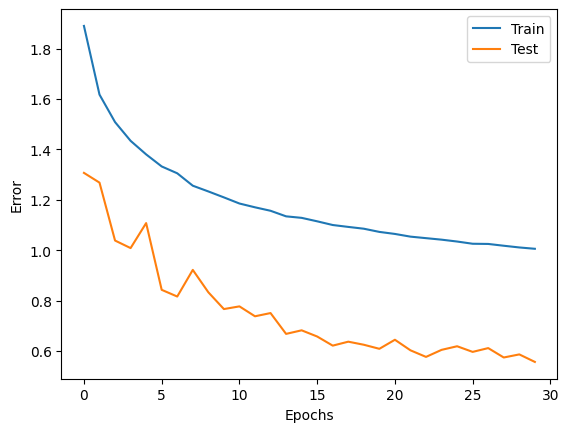

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [ ]:
correct = 0
total = 0
net.eval()  # 평가 모드
for i, (x, t) in enumerate(test_loader):
    x, t = x.cuda(), t.cuda()  # GPU 대응
    y = net(x)
    correct += (y.argmax(1) == t).sum().item()
    total += len(x)
print("정답률:", str(correct/total*100) + "%")

정답률: 79.78%


In [ ]:
import torch

# state_dict()의 표시
for key in net.state_dict():
    print(key, ": ", net.state_dict()[key].size())

# 저장
torch.save(net.state_dict(), "model_cnn.pth")

conv1.weight :  torch.Size([8, 1, 3, 3])
conv1.bias :  torch.Size([8])
conv2.weight :  torch.Size([16, 8, 3, 3])
conv2.bias :  torch.Size([16])
bn1.weight :  torch.Size([16])
bn1.bias :  torch.Size([16])
bn1.running_mean :  torch.Size([16])
bn1.running_var :  torch.Size([16])
bn1.num_batches_tracked :  torch.Size([])
conv3.weight :  torch.Size([32, 16, 3, 3])
conv3.bias :  torch.Size([32])
conv4.weight :  torch.Size([64, 32, 3, 3])
conv4.bias :  torch.Size([64])
bn2.weight :  torch.Size([64])
bn2.bias :  torch.Size([64])
bn2.running_mean :  torch.Size([64])
bn2.running_var :  torch.Size([64])
bn2.num_batches_tracked :  torch.Size([])
fc1.weight :  torch.Size([256, 1024])
fc1.bias :  torch.Size([256])
fc2.weight :  torch.Size([10, 256])
fc2.bias :  torch.Size([10])
